In [1]:
import pandas as pd
import numpy as np

## 4-1 선형 회귀분석

In [9]:
iris = pd.read_csv('iris.csv')

In [5]:
iris.head(15) #데이터 확인하기

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
iris.isnull().sum() # null 값 확인 

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [7]:
iris.describe() #해당 데이터의 기초통계 확인

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.skew()   #각 변수들의 skewness 확인. 

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

In [5]:
iris.corr() #각 변수간 상관관계 파악하기. 각 변수들 가운데 어떤 것을 남기고 어떤 것을 지울 것인지?

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


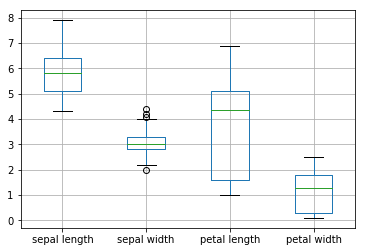

In [14]:
iris.boxplot() #sepla width에 이상치 존재하는 것 확인.

In [10]:
iris = iris.drop(['class'],1)

In [11]:
Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)
IQR = Q3-Q1

In [12]:
iris

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [13]:
IQR

sepal length    1.3
sepal width     0.5
petal length    3.5
petal width     1.5
dtype: float64

In [14]:
iris[(iris>(Q1-IQR*1.5))&(iris<(Q3+IQR*1.5))] # outlier 제거  # 다시 이해하기!

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [17]:
X = iris.drop(['petal width'],1).values
y = iris['petal width'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
y_pred = model.predict(X_test)

In [21]:
import matplotlib.pyplot as plt

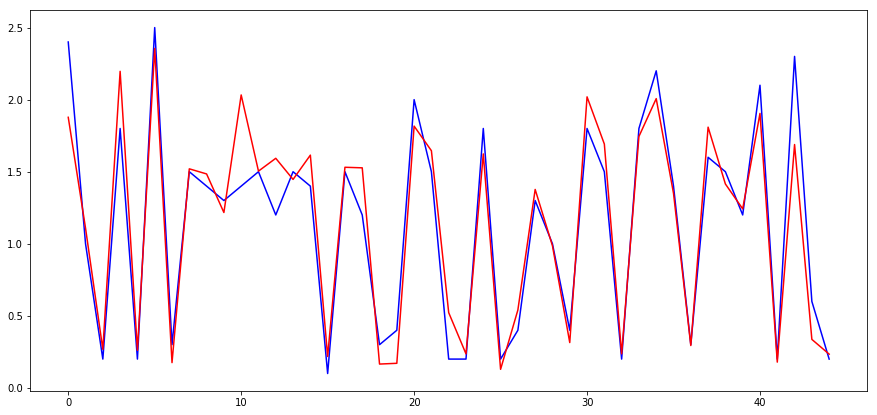

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(y_test,c='b')
plt.plot(y_pred,c='r')

In [26]:
accuracy_score(y_test, y_pred)

ValueError: continuous is not supported

## 4-2 선형판별분석

In [27]:
data = pd.read_csv("cell_samples_string.csv")

In [ ]:
data.head(20)

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [31]:
data.corr()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.101696,-0.060051,-0.052072,-0.034901
Clump,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.582805,0.558428,0.535835,0.350034
UnifSize,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.683438,0.755721,0.722865,0.458693
UnifShape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707278,0.735948,0.719446,0.438911
MargAdh,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.660617,0.666715,0.603352,0.417633
SingEpiSize,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.576951,0.616102,0.628881,0.479101
BareNuc,-0.101696,0.582805,0.683438,0.707278,0.660617,0.576951,1.000000,0.673477,0.575955,0.334945
BlandChrom,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.673477,1.000000,0.665878,0.344169
NormNucl,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.575955,0.665878,1.000000,0.428336
Mit,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.334945,0.344169,0.428336,1.000000


In [3]:
from category_encoders import *
enc = BinaryEncoder(cols=['Class']).fit(data)

In [4]:
data = enc.transform(data)

In [5]:
X = data.iloc[:,2:].values
y = data.iloc[:,0:2].values

In [6]:
y.shape

(699, 2)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [8]:
y = np.argmax(y,axis=1) # ?  shape 바꿔주는 것 같은데 ... 흠

In [9]:
lda.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [18]:
y_pred = lda.predict(X) # ? 뒤에..

## 4-3 SVM

In [44]:
data = pd.read_csv('vehicle.csv')

In [45]:
data.head(15)

,row ID,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18
0,Row0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,van
1,Row1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,van
2,Row2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,saab
3,Row3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,van
4,Row4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,bus
5,Row5,0.739130,0.923077,0.916667,0.296943,0.032967,0.075472,0.934641,0.000000,0.916667,0.728571,0.789474,0.926859,0.974843,0.342105,0.227273,0.219512,0.166667,0.066667,bus
6,Row6,0.521739,0.384615,0.458333,0.301310,0.197802,0.075472,0.267974,0.457143,0.166667,0.357143,0.242105,0.212230,0.396226,0.092105,0.590909,0.024390,0.800000,0.766667,bus
7,Row7,0.369565,0.384615,0.361111,0.231441,0.197802,0.132075,0.163399,0.628571,0.083333,0.400000,0.168421,0.116307,0.345912,0.105263,0.136364,0.073171,0.566667,0.700000,van
8,Row8,0.282609,0.038462,0.305556,0.157205,0.153846,0.094340,0.065360,0.800000,0.000000,0.128571,0.057895,0.046763,0.018868,0.065790,0.090909,0.341463,0.800000,0.900000,van
9,Row9,0.434783,0.423077,0.805556,0.406114,0.164835,0.169811,0.464052,0.285714,0.416667,0.400000,0.378947,0.384892,0.270440,0.065790,0.181818,0.341463,0.633333,0.766667,saab


In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [39]:
data.skew()

Col0     0.381271
Col1     0.262799
Col2     0.107221
Col3     0.390706
Col4     3.821570
Col5     6.778409
Col6     0.605779
Col7     0.047845
Col8     0.770685
Col9     0.256359
Col10    0.651814
Col11    0.835837
Col12    0.280231
Col13    2.072584
Col14    0.773792
Col15    0.689326
Col16    0.248541
Col17   -0.226341
dtype: float64

In [43]:
data.corr() #svm에서 상관관계 높은 변수에 대해 어떻게 처리할지에 대해?

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17
Col0,1.000000,0.692869,0.792444,0.691659,0.093222,0.148248,0.813003,-0.788647,0.813437,0.676143,0.764415,0.818632,0.585347,-0.252984,0.233693,0.156779,0.297780,0.365552
Col1,0.692869,1.000000,0.798492,0.622778,0.149692,0.247466,0.860367,-0.828755,0.857925,0.965776,0.808496,0.852679,0.936080,0.058669,0.148433,-0.015482,-0.113047,0.038677
Col2,0.792444,0.798492,1.000000,0.771644,0.161529,0.264307,0.907280,-0.912307,0.895326,0.774524,0.864432,0.889661,0.705818,-0.231660,0.116478,0.264522,0.147980,0.335453
Col3,0.691659,0.622778,0.771644,1.000000,0.665406,0.448048,0.738460,-0.792557,0.711497,0.570154,0.797588,0.725781,0.539069,-0.182412,0.050534,0.174299,0.380757,0.469278
Col4,0.093222,0.149692,0.161529,0.665406,1.000000,0.648097,0.106063,-0.185086,0.079982,0.129168,0.274705,0.092182,0.124408,0.152305,-0.056807,-0.034180,0.238195,0.267381
Col5,0.148248,0.247466,0.264307,0.448048,0.648097,1.000000,0.166768,-0.180043,0.161860,0.305941,0.319429,0.144605,0.189789,0.294549,0.015218,0.043379,-0.027317,0.143918
Col6,0.813003,0.860367,0.907280,0.738460,0.106063,0.166768,1.000000,-0.973385,0.992088,0.810648,0.951862,0.996318,0.800932,-0.028618,0.074347,0.210707,0.004053,0.119950
Col7,-0.788647,-0.828755,-0.912307,-0.792557,-0.185086,-0.180043,-0.973385,1.000000,-0.950512,-0.775531,-0.938392,-0.956522,-0.766146,0.104875,-0.053346,-0.185189,-0.112046,-0.216725
Col8,0.813437,0.857925,0.895326,0.711497,0.079982,0.161860,0.992088,-0.950512,1.000000,0.813305,0.938266,0.992346,0.798282,-0.016333,0.082346,0.213088,-0.022056,0.098519
Col9,0.676143,0.965776,0.774524,0.570154,0.129168,0.305941,0.810648,-0.775531,0.813305,1.000000,0.747152,0.798071,0.866479,0.040339,0.137473,0.001183,-0.107718,0.076770


In [40]:
data

,row ID,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18
0,Row0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,van
1,Row1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,van
2,Row2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,saab
3,Row3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,van
4,Row4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,bus
5,Row5,0.739130,0.923077,0.916667,0.296943,0.032967,0.075472,0.934641,0.000000,0.916667,0.728571,0.789474,0.926859,0.974843,0.342105,0.227273,0.219512,0.166667,0.066667,bus
6,Row6,0.521739,0.384615,0.458333,0.301310,0.197802,0.075472,0.267974,0.457143,0.166667,0.357143,0.242105,0.212230,0.396226,0.092105,0.590909,0.024390,0.800000,0.766667,bus
7,Row7,0.369565,0.384615,0.361111,0.231441,0.197802,0.132075,0.163399,0.628571,0.083333,0.400000,0.168421,0.116307,0.345912,0.105263,0.136364,0.073171,0.566667,0.700000,van
8,Row8,0.282609,0.038462,0.305556,0.157205,0.153846,0.094340,0.065360,0.800000,0.000000,0.128571,0.057895,0.046763,0.018868,0.065790,0.090909,0.341463,0.800000,0.900000,van
9,Row9,0.434783,0.423077,0.805556,0.406114,0.164835,0.169811,0.464052,0.285714,0.416667,0.400000,0.378947,0.384892,0.270440,0.065790,0.181818,0.341463,0.633333,0.766667,saab


In [41]:
X = data.drop(['row ID','Col18'],1).values
y = data.iloc[:,19].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
from sklearn.svm import SVC
model1 = SVC(kernel='rbf', C=0.5)  # 커널함수 rbf
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


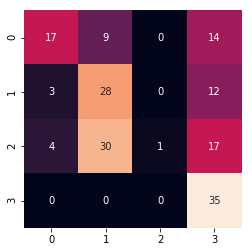

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; 
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)

In [ ]:
model2 = SVC(kernel = 'poly', gamma = 1.0, degree = 1.0)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, square=True, annot=True, fmt='d', cbar=False)
accuracy_score(y_test, y_pred2)

In [ ]:
model3 = SVC(kernel = 'sigmoid', gamma = 1.0)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

In [ ]:
cm3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm3, square=True, annot=True, fmt='d', cbar=False)
accuracy_score(y_test, y_pred3)

In [ ]:
poly_model = SVC(kernel = 'poly', gamma = 1.0, degree = 1.0, C = 0.1)
poly_model.fit(X_train,y_train)
y_pred4 = poly_model.predict(X_test)
accuracy_score(y_test, y_pred4)

In [ ]:
poly_model = SVC(kernel = 'poly', gamma = 1.0, degree = 1.0, C = 3)
poly_model.fit(X_train,y_train)
y_pred4 = poly_model.predict(X_test)
accuracy_score(y_test, y_pred4)

## 4-4 로지스틱 회귀분석

In [59]:
data = pd.read_csv("churn123.txt")
data.head(10)

,ID,LONGDIST,International,LOCAL,DROPPED,PAY_MTHD,LocalBillType,LongDistanceBillType,AGE,SEX,STATUS,CHILDREN,Est_Income,Car_Owner,CHURNED,train
0,0,5.246400,7.51510,86.32780,0,'CH','FreeLocal','Standard',57,'F','M',2,27535.30,'Y','Vol',1
1,3,0.000000,0.00000,3.94229,0,'CC','Budget','Intnl_discount',50,'F','S',2,64632.30,'N','InVol',2
2,4,5.555640,0.00000,9.36347,1,'CC','Budget','Intnl_discount',68,'F','M',2,81000.90,'N','Vol',1
3,8,14.019300,5.68043,29.80650,0,'CC','Budget','Standard',34,'M','S',0,87467.10,'Y','Current',1
4,10,13.664000,2.95642,32.63810,0,'CC','FreeLocal','Intnl_discount',60,'M','M',2,83220.60,'N','Vol',1
5,11,0.000000,0.00000,1.41294,0,'CC','FreeLocal','Standard',84,'F','S',0,50290.70,'N','InVol',3
6,13,0.281029,0.00000,8.53692,0,'CH','Budget','Intnl_discount',28,'F','M',2,20850.40,'N','Vol',1
7,17,1.577000,0.00000,19.98080,0,'CC','FreeLocal','Standard',52,'M','S',0,84112.60,'N','Current',1
8,19,11.030700,0.00000,34.27770,0,'CC','Budget','Standard',87,'F','S',2,3776.12,'N','Vol',3
9,20,0.452629,0.00000,73.01220,0,'Auto','FreeLocal','Standard',88,'F','M',2,73865.90,'Y','Vol',1


In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

In [60]:
data.corr()

,ID,LONGDIST,International,LOCAL,DROPPED,AGE,CHILDREN,Est_Income,train
ID,1.000000,0.040517,0.003354,0.071852,0.006739,0.003133,-0.003654,0.014006,-0.040342
LONGDIST,0.040517,1.000000,0.078213,0.138777,-0.045253,-0.011763,0.045590,0.015505,-0.034023
International,0.003354,0.078213,1.000000,0.077572,0.015829,-0.008868,-0.030019,0.021308,0.010379
LOCAL,0.071852,0.138777,0.077572,1.000000,-0.026480,0.024608,0.051552,0.056706,0.019450
DROPPED,0.006739,-0.045253,0.015829,-0.026480,1.000000,-0.008488,0.009629,0.051388,-0.048427
AGE,0.003133,-0.011763,-0.008868,0.024608,-0.008488,1.000000,-0.022262,0.049113,-0.011200
CHILDREN,-0.003654,0.045590,-0.030019,0.051552,0.009629,-0.022262,1.000000,-0.021548,-0.004597
Est_Income,0.014006,0.015505,0.021308,0.056706,0.051388,0.049113,-0.021548,1.000000,-0.016775
train,-0.040342,-0.034023,0.010379,0.019450,-0.048427,-0.011200,-0.004597,-0.016775,1.000000


In [61]:
data['Leaver'] = data['CHURNED'].apply(lambda x: 'T' if x == "'Vol'" else 'F')

In [62]:
from sklearn.preprocessing import normalize
X = data.drop(["ID","CHURNED","Leaver"],1)
X = normalize(X.drop(["train"],1).select_dtypes(include=[np.number]))
y = data["Leaver"].values

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

c:\users\ina lee\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
y_pred = model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6644144144144144